In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
address = r"\shock_table_input_data_simplified_no_outliers.csv"
dataset = pd.read_csv(address)

In [3]:
dataset.shape

(143, 19)

In [ ]:
dataset.head(2)

In [5]:
dataset.describe()

,Acceleration (G),Blow Vertical Direction (0/1),Blow Side Direction (0/1),Blow Front Direction (0/1),"Sensor X-Axis, Side Direction (0/1)","Sensor Y-Axis, Vertical Direction (0/1)","Sensor Z-Axis, Front Direction (0/1)",Console Mass (kg),Fixture Mass (kg),Hardware Mass (kg),Anvil Table Mass (kg),Hammer Height (m),Table Travel (m),CG Height (m),Number of Bottom Isolators,Number of Side Isolators,Isolator Damping Coefficient,Isolator Stiffness (N/mm)
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,143.000000
mean,110.082867,0.482517,0.314685,0.202797,0.265734,0.349650,0.384615,226.516294,1111.966224,684.697063,2023.17958,1.001822,0.063729,1.270585,6.545455,1.146853,5.000000e-02,149.158601
std,91.304250,0.501451,0.466023,0.403496,0.443276,0.478536,0.488214,123.000121,447.134356,510.988410,632.17810,0.471262,0.018275,0.251591,2.177760,1.221625,1.392657e-17,102.594067
min,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.430000,181.360000,110.380000,680.80000,0.076200,0.038100,0.838200,0.000000,0.000000,5.000000e-02,40.470000
25%,39.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.730000,778.640000,163.700000,1514.10000,0.690000,0.038100,1.121100,6.000000,0.000000,5.000000e-02,66.735000
50%,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.730000,1219.090000,863.140000,1911.74000,0.838200,0.076200,1.270000,8.000000,2.000000,5.000000e-02,122.590000
75%,169.525000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,327.270000,1547.110000,1040.060000,2473.86000,1.524000,0.076200,1.520000,8.000000,2.000000,5.000000e-02,219.295000
max,390.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1731.360000,1469.110000,2979.05000,1.680000,0.080000,1.574800,8.000000,4.000000,5.000000e-02,316.000000


In [6]:
dataset.isnull().any()

Project Console                            False
Acceleration (G)                           False
Blow Vertical Direction (0/1)              False
Blow Side Direction (0/1)                  False
Blow Front Direction (0/1)                 False
Sensor X-Axis, Side Direction (0/1)        False
Sensor Y-Axis, Vertical Direction (0/1)    False
Sensor Z-Axis, Front Direction (0/1)       False
Console Mass (kg)                          False
Fixture Mass (kg)                          False
Hardware Mass (kg)                         False
Anvil Table Mass (kg)                      False
Hammer Height (m)                          False
Table Travel (m)                           False
CG Height (m)                              False
Number of Bottom Isolators                 False
Number of Side Isolators                   False
Isolator Damping Coefficient               False
Isolator Stiffness (N/mm)                  False
dtype: bool

<AxesSubplot:>

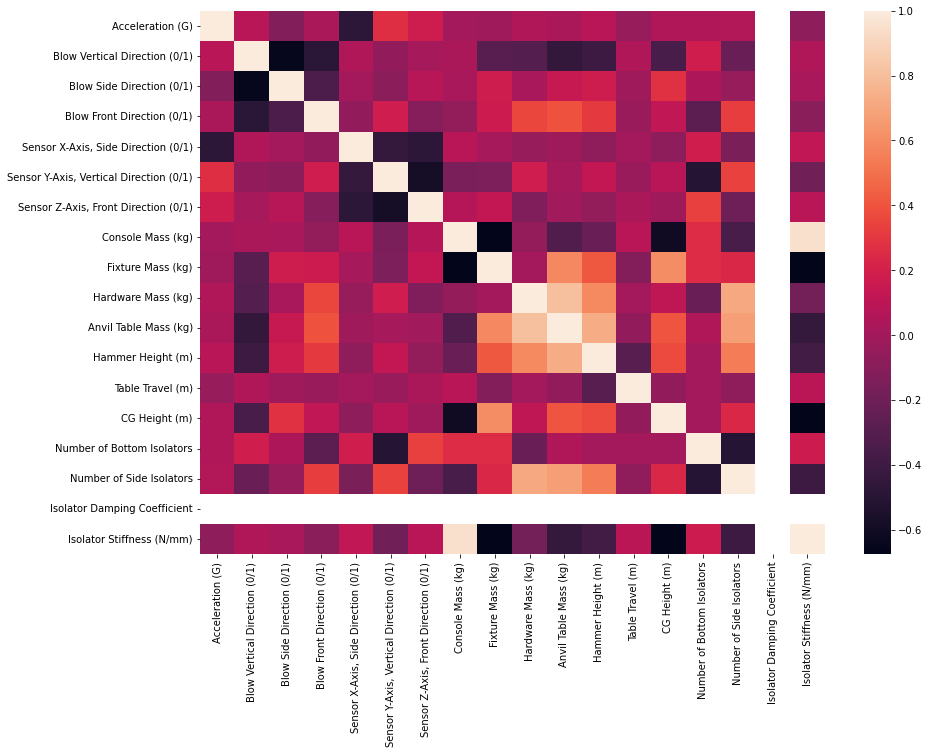

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr())

In [8]:
X = dataset.iloc[:, 2:].values  # Column index 2 to the end
y = dataset.iloc[:, 1].values  # Column index 1 (acceleration)

In [9]:
X.shape

(143, 17)

In [10]:
y.shape

(143,)

<AxesSubplot:ylabel='Count'>

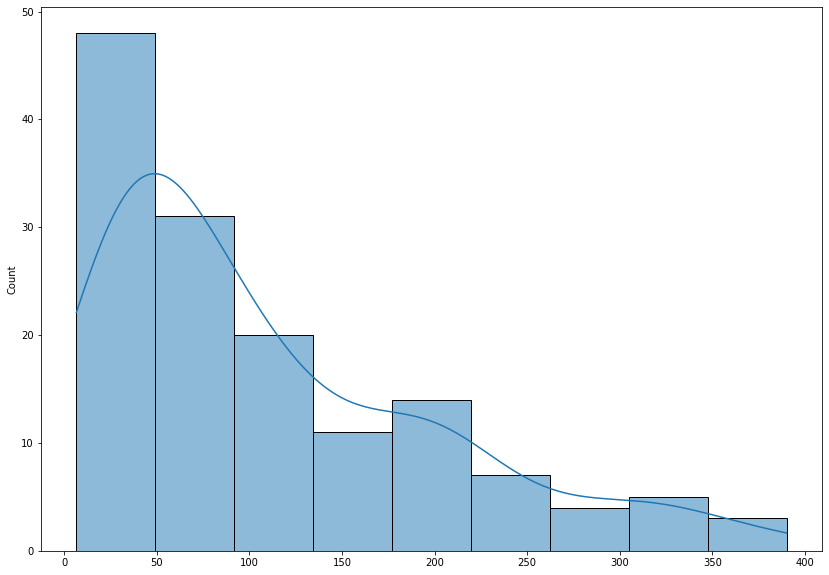

In [11]:
plt.figure(figsize=(14,10))
sns.histplot(y, kde=True)

<AxesSubplot:ylabel='Count'>

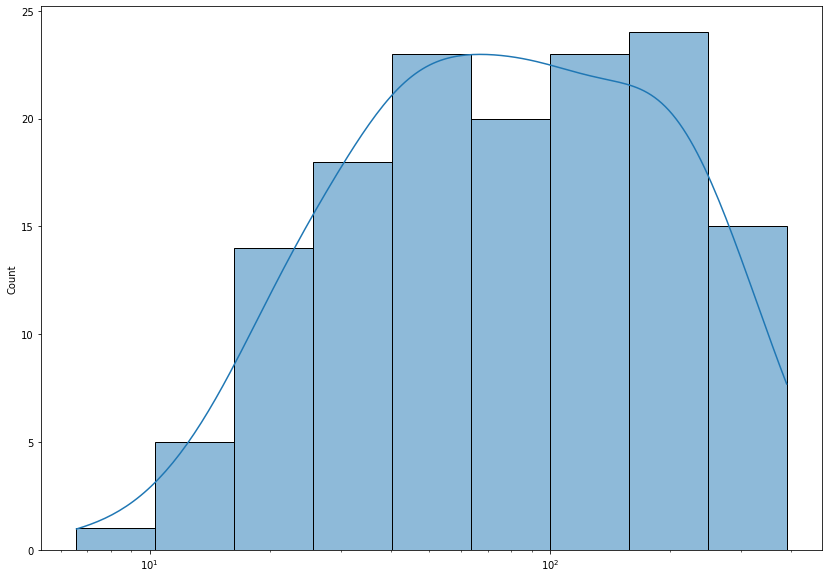

In [12]:
plt.figure(figsize=(14,10))
sns.histplot(y, log_scale=True, kde=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train);

In [15]:
columns = list(dataset.columns)[2:]
coeff = pd.DataFrame(regressor.coef_, index=columns, columns=["Coefficients"])
coeff

,Coefficients
Blow Vertical Direction (0/1),-1.604062e+09
Blow Side Direction (0/1),-1.604062e+09
Blow Front Direction (0/1),-1.604062e+09
"Sensor X-Axis, Side Direction (0/1)",2.012419e+09
"Sensor Y-Axis, Vertical Direction (0/1)",2.012419e+09
"Sensor Z-Axis, Front Direction (0/1)",2.012419e+09
Console Mass (kg),2.137057e+12
Fixture Mass (kg),2.137057e+12
Hardware Mass (kg),2.137057e+12
Anvil Table Mass (kg),-2.137057e+12


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
prediction = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
prediction.head(10).round(2)

,Actual,Predicted
0,29.00,67.46
1,20.90,139.07
2,390.00,125.50
3,150.00,90.00
4,100.00,132.50
5,21.73,110.07
6,110.00,98.71
7,105.00,237.40
8,140.00,243.90
9,6.57,27.07


Text(0, 0.5, 'Acceleration (G)')

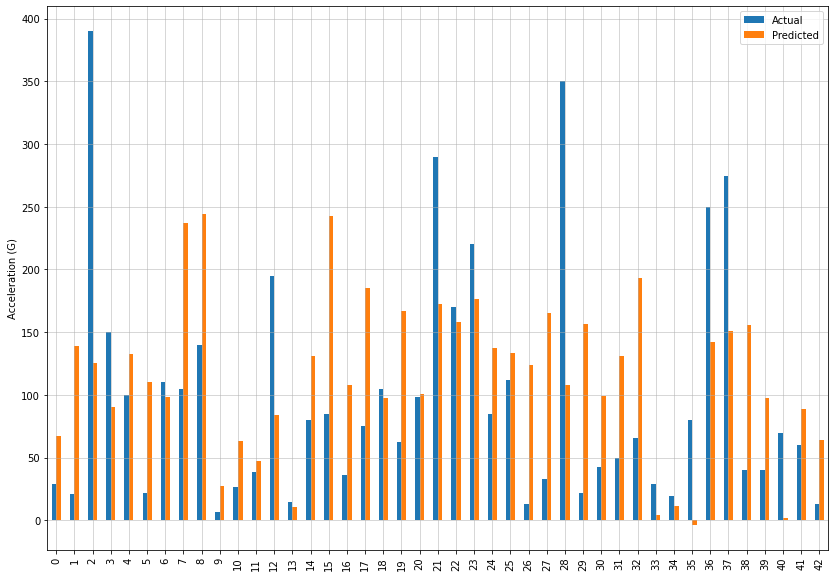

In [18]:
fig = prediction.plot(kind="bar", figsize=(14,10))
fig.grid(linewidth=0.5)
fig.set_ylabel("Acceleration (G)")

In [19]:
print("Mean absolute error:", round(metrics.mean_absolute_error(y_test, y_pred)))

Mean absolute error: 78
